In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x=data.data
y=data.target
print("shape of data:",x.shape)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_new=scaler.fit_transform(x)

shape of data: (569, 30)


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.10, random_state=2021)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [77]:
def weights_bias(shape):
    weights = np.full((shape,1),0.1)
    bias = 1
    return weights,bias

In [78]:
def sigmoid(z):  
    y_predict = 1/(1+ np.exp(-z))
    return y_predict

In [79]:
def forward_backward(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_predict = sigmoid(z)
    derivative_weight = (np.dot(x_train,((y_predict-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_predict-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return gradients

In [80]:
def update_parameters(w, b, x_train, y_train, learning_rate,iterations):
    index = []
    for i in range(iterations):
        gradients = forward_backward(w,b,x_train,y_train)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
    parameters = {"weight": w,"bias": b}
    return parameters, gradients

In [81]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [84]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  iterations):
    shape =  x_train.shape[0]
    w,b = weights_bias(shape)
    parameters, gradients = update_parameters(w, b, x_train, y_train, learning_rate,iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    score = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
    return score


In [111]:
loss_values=[]
for i in range(1,200):
    loss_values+=[logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, iterations = i)]
    i+=1

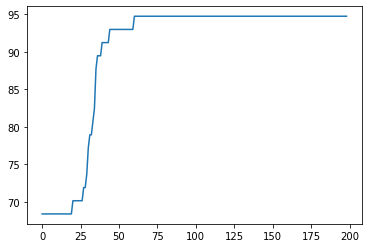

In [112]:
from matplotlib import pyplot as plt
plt.plot(loss_values)
plt.show()